# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [2]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#lendo a base de dados
df = pd.read_csv('/kaggle/input/previsao-de-renda/previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


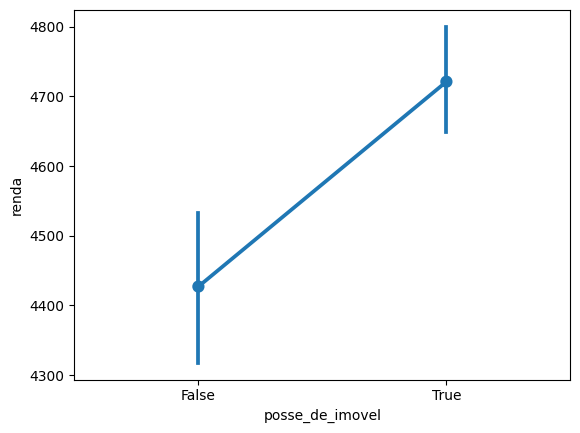

In [5]:
#gerando um grafico para analisar se as variaveis sao boas preditoras de renda

axes = sns.pointplot(x='posse_de_imovel', y='renda',
                     data=df, dodge=True, errorbar =('ci', 90))

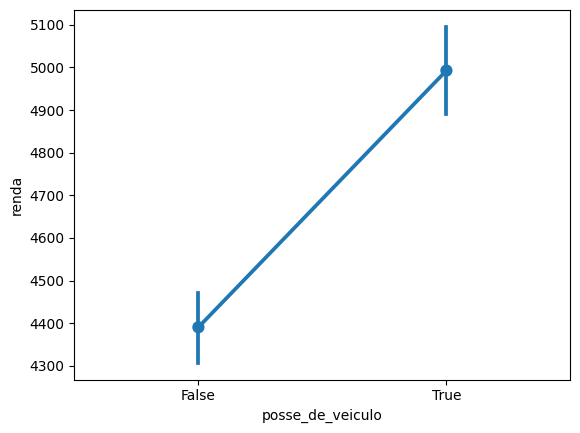

In [7]:
axes = sns.pointplot(x='posse_de_veiculo', y='renda',
                     data=df, dodge=True, errorbar =('ci', 90))

Analisando os gráficos gerados, tanto a posse de um imóvel, quanto a posse de um veiculo nos trazem uma ideia de que quem possui maior renda consegue adquirir esse tipo de bem material, uma vez que a média dos intervalos das rendas para pessoas que possuem veículos ou imóveis está superior à média dos intervalos das rendas das pessoas que não possuem imóvel ou veículo. 

Outro ponto interessante observado que pessoas com maiores rendas geralmente adquirem veículos, porem nem todos que possuem uma boa renda adquirem imóveis. 

In [12]:
#criando uma variavel para armazenas as pessoas que possuem ambos e as que nao possuem nenhum deles
pv = df['posse_de_veiculo']
pi = df['posse_de_imovel']

In [18]:
possui_veiculo_imovel = pi & pv

In [19]:
n_possui_veiculo_imovel = ~(pi&pv)

In [20]:
df['possui_veiculo_imovel'] = possui_veiculo_imovel
df['n_possui_veiculo_imovel'] = n_possui_veiculo_imovel

In [21]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,possui_veiculo_imovel,n_possui_veiculo_imovel
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,False,True
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,True,False
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98,True,False
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69,False,True
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37,False,True


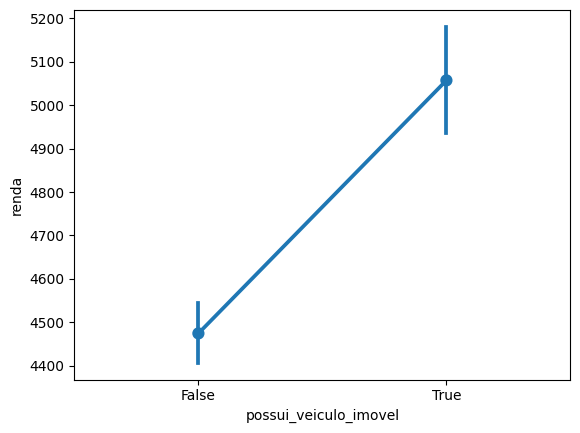

In [22]:
#analisando o grafico das pessoas que possuem ambos

axes = sns.pointplot(x='possui_veiculo_imovel', y='renda',
                     data=df, dodge=True, errorbar =('ci', 90))

Com esse novo gráfico, é possível perceber que a renda de quem tem imóvel e veiculo possui uma renda maior da pessoa que não tem veículo nem imóvel. Então, a posse de imóveis ou veículos, são boas preditoras para discriminar a renda.  